# Week 4

In this task we will explore the effect of **model mismatch** on model selection, and the related concept of **brittleness** (a term coined in Chandrasekaran et al. 2018).
As may be intuitive, mismatch of either model with the true data generative process would lead to additional systematic errors in model selection (as hypothesis testing).
Brittleness refers to a special case of this: in order to quantitatively evaluate empirical evidence for a conceptual hypothesis (such as whether a LIP neuron continuously
accumulates evidence by ramping up its activity, or whether its firing rate abruptly jumps during a trial) we need to concuct a precise mathematical model to encapsulate
the alternative conceptual hypotheses. In order to carry out probabilistic/Bayesian inference we further need these models to be probabilistic models, with a likelihood function
and a prior distribution over parameters. In the process of designing such mathematical models, in general, and probabilistic models, in particular, various choices need to be made
for different aspects of the model which are independent of the conceptual hypotheses and are not constrained by them.<br>

For example, in our case, a model that is identical to our step model, but has a jump time distribution that is not negative binomial, but, say, a uniform distribution, is still consistent with the
conceptual hypothesis of a discontinous jump in the firing rate, as opposed to a continuous ramp.
As another example, our two competing hypotheses differ only in their predictions for the behaviour of latent firing rates, and are silent on the precise mechanism or statistical form of 
spiking based on those firing rates. However, in order to build a probabilistic model of our observed data (spike counts) we needed to make a modeling choice and decided to model spike counts as Poisson distributed (conditional on rates).<br>

But what if reality deviates from these assumptions? What effect would such deviations have on our inferences about the true mechanism underlying the data?<br>
Finally, what can we do to reduce the brittleness of hypothesis testing? This task in intended to provide insight about these questions. 

For all the tasks below, use $M = 10$, and unless otherwise instructed, $N_{\rm trials} = 25$, to save on computational time. For number of datasets (to evaluate error rates)
use 10 datasets at a minimum, but no need to exceed 100. (But **be strategic about choice of number of datasets**. If you see, based on small-scale explorations, that a trend that
is the subject of a sub-task or question is visible for smaller number of datasets, you don't need to use large datasets.)

### Task 4.1
**Non-Poissonian spiking**

Here you will study the effect of (unaccounted) non-Poissonian spiking on the model selection. The function `gamma_isi_point_process` in `models.py` allows you
to simulate non-Poissonian spikes within a certain family for which inter-spike interval (ISI)  distributions deviate from the exponential distribution
which is the ISI distribution under Poisson spiking (this corresponds to the special case of `shape = 1` for the parameter of `gamma_isi_point_process`).
(You are not directly interested in ISI's and their distribution for the tasks.) 

Generalise your code implementing the HMM-based ramp and step models to emit spikes according to the new distribution family (inspection of the `emit` methods of the ramp and step model<br>
classes in `models.py`  shows you how to use `gamma_isi_point_process`).

**4.1.1** Investigate the behavior of the two types (true para, mismatched para) of model-selection error rate (the mis-classification rate for each case of true model) with increasing values of the
`shape` parameter of `gamma_isi_point_process` (do not use values of `shape` less than 1, and no need to go above 5). Try this for a few different choices of true model parameters
(making sure they are chosen to produce ramp-like PSTH's). In this sub-task use $N_{\rm trials} = 25$.

**How does deviation from Poisson  (with `shape` > 1) affect the two error rates?** Does it bias the model selection to one or the other model systematically? If so, towards which model?  

**4.1.2** The model-mismatch due to non-Poisson spiking is an example of mismatch of a model's likelihood with the true data-generating model. A mismatch of model prior with the 
true distribution from which true model parameters are sampled (in the real world, this could correspond to the variation of parameters across real LIP neurons, for example)
can also affect model selection. You have already investigated this in 3.2.2. **Investigate the difference in the effect of number of trials on model misclassification biases, 
for the two cases of prior mismatch and unaccounted non-Poissonian spiking** (choose a sensible degree of prior mismatch based on your explorations in 3.2.2).
If there is a systematic difference, try to provide an explanation.

(You can use $N_{\rm trials} = 10, 20, 50, 200$ --and higher if possible-- and you can fix the true parameters, including `shape`, to reasonable values; reasonable according to your previous findings.)

### Task 4.2

**Understanding the effects of non-Poissonian spiking**

This task only involves simulation (spike train generation) of the HMM models (or the models from `models.py`, up to you) with `gamma_isi_point_process` used for spike emission.
By **remaking the sort of plots you made in Week 1** (e.g. raster plots and plots of PSTH and Fano Factor vs. time) for the non-Poissonian model and 
observing its behavior, answer the following questions:

- **How does `shape` affect spiking quality and the resulting Fano Factor behaviour**?
- Based on your observations, try to **explain the effects  that you observed in **4.1.1** of  non-Poisson spiking on model selection errors**. 


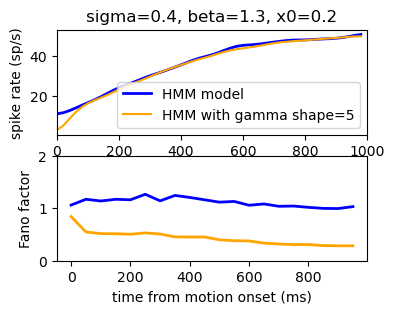

In [21]:
# PSTH and Fano, ramp

from models import *
from models2 import *



T = 100
N = 2000
K = 50
bin_size = 20
bin_size_2 = 50

x0=0.2

for b in [1.3]:
    for s, x0 in [ [0.4, 0.2]]:

        fig, (ax1, ax2) = plt.subplots(2, figsize=(4,3))
#         fig, ax1 = plt.subplots(1, figsize=(4,3))

        # Create models
        ramp = RampModel(beta=b, sigma=s, x0=x0, Rh=50)

        # Simulate models
#         arr = ramp.simulate(Ntrials=N, T=T, get_rate=True)
        arr_HMM = ramp.simulate_HMM(Ntrials=N, T=T, K=K, get_rate=True)
        arr_HMM_gamma = ramp.simulate_HMM(Ntrials=N, T=T, K=K, get_rate=True, GammaShape=5)

        # Calculate PSTH and Fano factor
#         _, gaussian_smoothed_psth, _, fano = generate_psth(spike_trains=arr[0], bin_size=bin_size, bin_size_2=bin_size_2, plot=False)
        _, gaussian_smoothed_psth_HMM, _, fano_HMM = generate_psth(spike_trains=arr_HMM[0], bin_size=bin_size, bin_size_2=bin_size_2, plot=False)
        _, gaussian_smoothed_psth_HMM_gamma, _, fano_HMM_gamma = generate_psth(spike_trains=arr_HMM_gamma[0], bin_size=bin_size, bin_size_2=bin_size_2, plot=False)

        bin_edges = np.arange(0, 1e3+bin_size, bin_size)
        bin_edges_2 = np.arange(0, 1e3+bin_size_2, bin_size_2)

        # Plot PSTH in the first subplot
#         ax1.plot(bin_edges[:-1], gaussian_smoothed_psth, color='', label='Original model', linewidth=1.5)
        ax1.plot(bin_edges[:-1], gaussian_smoothed_psth_HMM, color='blue', label='HMM model', linewidth=2)
        ax1.plot(bin_edges[:-1], gaussian_smoothed_psth_HMM_gamma, color='orange', label='HMM with gamma shape=5', linewidth=1.5)
        ax1.set_ylabel("spike rate (sp/s)")
#         ax1.set_ylim(0,55)
        ax1.set_xlim(0,1000)
        ax1.legend()

        # Plot Fano factor in the second subplot
#         ax2.plot(bin_edges_2[:-1], fano, color='blue', linewidth=2)
        ax2.plot(bin_edges_2[:-1], fano_HMM, color='blue', linewidth=2)
        ax2.plot(bin_edges_2[:-1], fano_HMM_gamma, color='orange', linewidth=2)
        ax2.set_ylim([0,2])
        ax2.set_xlabel("time from motion onset (ms)")
        ax2.set_ylabel("Fano factor")

        ax1.set_title(f"sigma={s}, beta={b}, x0={x0}")
#         filename = f"results/week2/PSTH_FF_RAMP_s{s}_beta{b}_x0={x0}.png"
#         plt.savefig(filename,bbox_inches='tight')
        plt.show()


r=30
Gamma HMM Model took 0.6299629211425781 seconds
Inhomo HMM model took 0.6333091259002686 seconds


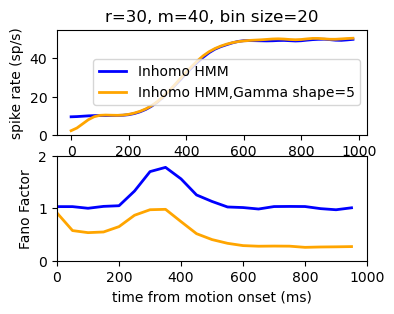

In [22]:
# PSTH and FF, step
m_list = [40]
r_list = [30]
import time

for m in m_list:
    for r in r_list:
        fig, (ax1, ax2) = plt.subplots(2, figsize=(4, 3))
#         fig, ax1 = plt.subplots(1, figsize=(4, 3))

        step = StepModel(m=m, r=r, x0=0.2, Rh=50)
        T = 100
        N = 2000
#         start_time = time.time()
#         step_arr = step.simulate(Ntrials=N, get_rate=True, T = T)
#         step_time = time.time() - start_time
        
        start_time = time.time()
        step_arr_HMM_gamma = step.simulate_HMM_inhomo(Ntrials=N, get_rate=True, T = T, GammaShape=5)
        step_time_HMM_gamma = time.time() - start_time
        
        start_time = time.time()
        step_arr_HMM_inhomo = step.simulate_HMM_inhomo(Ntrials=N, get_rate=True, T = T, GammaShape=1)
        step_time_HMM_inhomo = time.time() - start_time

        print(f"r={r}")
#         print(f"Original Model took {step_time} seconds")
        print(f"Gamma HMM Model took {step_time_HMM_gamma} seconds")
        print(f"Inhomo HMM model took {step_time_HMM_inhomo} seconds")

        bin_size=20
        bin_edges = np.arange(0, 1e3+bin_size, bin_size)
        bin_size_2=50
        bin_edges_2 = np.arange(0, 1e3+bin_size_2, bin_size_2)   

        ## this method considers the multi-spike issue ##
#         _, gaussian_smoothed_psth, _, fano = generate_psth(spike_trains=step_arr[0], bin_size=bin_size, bin_size_2=50, plot=False);
        _, gaussian_smoothed_psth_HMM_gamma, _, fano_HMM_gamma = generate_psth(spike_trains=step_arr_HMM_gamma[0], bin_size=bin_size, bin_size_2=50, plot=False);
        _, gaussian_smoothed_psth_HMM_inhomo, _, fano_HMM_inhomo = generate_psth(spike_trains=step_arr_HMM_inhomo[0], bin_size=bin_size, bin_size_2=50, plot=False);


        # Plot the PSTH
#         ax1.plot(bin_edges[:-1], gaussian_smoothed_psth,  label='Original', linewidth = 2)
        ax1.plot(bin_edges[:-1], gaussian_smoothed_psth_HMM_inhomo,   color='blue',label='Inhomo HMM', linewidth = 2)
        ax1.plot(bin_edges[:-1], gaussian_smoothed_psth_HMM_gamma, color='orange', label='Inhomo HMM,Gamma shape=5', linewidth = 2)

#         # Plot the FF
#         ax2.plot(bin_edges_2[:-1], fano, linewidth=2)
        ax2.plot(bin_edges_2[:-1],fano_HMM_inhomo, color='blue', linewidth=2)
        ax2.plot(bin_edges_2[:-1],fano_HMM_gamma,color='orange', linewidth=2)
        ax1.set_ylabel("spike rate (sp/s)")
        ax2.set_xlabel("time from motion onset (ms)")
        
        ax1.legend()
        ax1.set_ylim(0,55)  
        ax2.set_ylim(0,2)  
        ax1.set_title(f"r={r}, m={m}, bin size={bin_size}")
        ax2.set_xlim(0,1000)
        ax2.set_ylabel("Fano Factor")
#         filename = f"results/2.2/PSTH_FF_step_r{r}_m{m}.png"
#         plt.savefig(filename,bbox_inches='tight')

#         plt.show()
#         plt.plot(step_arr_HMM_inhomo[2][:,0])
#         print(np.average(step_arr[2][:,0]))

# #         plt.plot(step_arr_HMM_inhomo[2][:,0])
# #         plt.plot(step_arr_HMM_inhomo[2][:,0])

        plt.show()


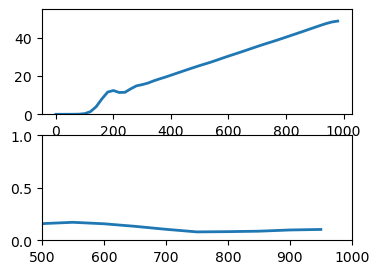

In [12]:
T=1000
Rh=50
N=5000
gamma=50

from models import *
from models2 import *

spikes = []
rate = np.linspace(0, 50, T)
dt=1/T
bin_size=20
bin_edges = np.arange(0, 1e3+bin_size, bin_size)
bin_size_2=50
bin_edges_2 = np.arange(0, 1e3+bin_size_2, bin_size_2)  

# spikes = emit(dt, rate, GammaShape=None)
# plt.plot(spikes)

# spikes = emit(dt, rate, GammaShape=5)
# plt.plot(spikes)
for n in range(N):
    spikes.append(emit(dt, rate, GammaShape=gamma))
spikes = np.array(spikes)
_, gaussian_smoothed_psth, _, fano = generate_psth(spike_trains=spikes, bin_size=20, bin_size_2=50, plot=False);


fig, (ax1, ax2) = plt.subplots(2, figsize=(4, 3))
ax1.plot(bin_edges[:-1], gaussian_smoothed_psth,  label='Gamma ', linewidth = 2)
ax1.set_ylim(0,55)  
ax2.set_ylim(0,1)  
ax2.set_xlim(500,1000)  

ax2.plot(bin_edges_2[:-1], fano, linewidth=2)




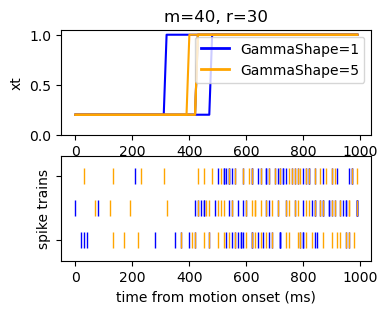

In [14]:
# xt trajectories and raster 
from models import *
from models2 import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Setup ##
T = 100
time_points = np.arange(T)  # 0,1,2,...

time_ms = time_points * 1e3/T
xr = 0.2
Rh = 50
K = 100 # num of state for ramp HMM

dt = 1/T # unit: s => when t=1s, std of ramp model = sigma
#dt = 1e3/T # ms

m_list = [40]
r_list = [30]
from matplotlib.lines import Line2D

N = 3
T=100

## sigma can be ANY value!
# m_list = [50, 80]
# r_list = [1, 10, 100, 1000]


for m in m_list:
    for r in r_list:
        fig, (ax1, ax2) = plt.subplots(2, figsize=(4,3))
        
        step = StepModel(m=m, r=r, x0=0.2, Rh=50)
        # The inhomo HMM
        step_arr_HMM_inhomo = step.simulate_HMM_inhomo(Ntrials=N, get_rate=True, T = T, GammaShape=1)
        # The inhomo HMM gamma
        step_arr_HMM_inhomo_gamma = step.simulate_HMM_inhomo(Ntrials=N, get_rate=True, T = T, GammaShape=5)
    
        for i in range(len(step_arr_HMM_inhomo[1])):
            ax1.plot(time_ms, step_arr_HMM_inhomo[2][i]/Rh, linewidth = 1.5, color='blue')

        for i in range(len(step_arr_HMM_inhomo[1])):
            ax1.plot(time_ms, step_arr_HMM_inhomo_gamma[2][i]/Rh, linewidth = 1.5, color='orange')
            
        ax1.set_ylabel("xt")
        ax1.set_ylim(0, 1.05)
        ax1.set_xlabel("time from motion onset (ms)")

        custom_lines = [Line2D([0], [0], color='blue', lw=2),
                        Line2D([0], [0], color='orange', lw=2)]
        ax1.legend(custom_lines, ['GammaShape=1', 'GammaShape=5'])
        ax1.set_title(f"m={m}, r={r}")

        spike_trains_timestamp_HMM_inhomo = []
        spike_trains_timestamp_HMM_inhomo_gamma = []

        for spike_train in step_arr_HMM_inhomo[0]: # for HMM model
            timestamp = []
            for i in range(len(spike_train)): # for each time point
                for j in range(spike_train[i]): 
                    timestamp.append(i*1e3/T)
            spike_trains_timestamp_HMM_inhomo.append(timestamp)
                        
        for spike_train in step_arr_HMM_inhomo_gamma[0]: # for HMM model
            timestamp = []
            for i in range(len(spike_train)): # for each time point
                for j in range(spike_train[i]): 
                    timestamp.append(i*1e3/T)
            spike_trains_timestamp_HMM_inhomo_gamma.append(timestamp)

        colors1 = ['C{}'.format(i) for i in range(len(step_arr_HMM_inhomo[0]))] #set different color for each set of neural data
        ax2.eventplot(spike_trains_timestamp_HMM_inhomo, colors='blue', linelengths=0.5, linewidths=1)
        ax2.eventplot(spike_trains_timestamp_HMM_inhomo_gamma, colors='orange', linelengths=0.5, linewidths=1)
        
        ax2.yaxis.set_tick_params(labelleft=False)
        ax2.set_xlabel("time from motion onset (ms)")
        ax2.set_ylabel("spike trains")

#         filename = f"results/2.2/step_xt_raster_m={m}_r={r}.png"
#         plt.savefig(filename,bbox_inches='tight')
        plt.show()


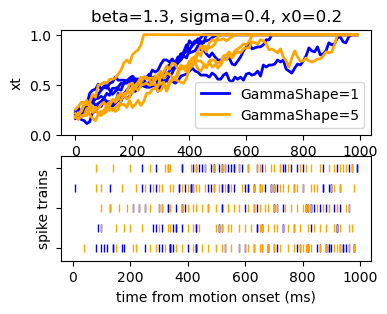

In [16]:
from matplotlib.lines import Line2D

N = 5
T=100
K=100

## sigma can be ANY value!
for beta in [1.3]:
    for sigma, x0 in [[0.4, 0.2]]:
# # xt trajectories and raster 

        fig, (ax1, ax2) = plt.subplots(2, figsize=(4,3))

        ramp = RampModel(beta, sigma, x0, Rh=50)
        ramp_arr_HMM = ramp.simulate_HMM(Ntrials=N, T=T, K=K, get_rate=True, GammaShape=1)
        ramp_arr_HMM_gamma = ramp.simulate_HMM(Ntrials=N, T=T, K=K, get_rate=True, GammaShape=5)

        for i in range(len(ramp_arr_HMM[1])):
            ax1.plot(time_ms, ramp_arr_HMM[1][i], linewidth = 2, color='blue')

        for i in range(len(ramp_arr_HMM_gamma[1])):
            ax1.plot(time_ms, ramp_arr_HMM_gamma[1][i], linewidth = 2, color='orange')

        ax1.set_ylabel("xt")
        ax1.set_ylim(0, 1.05)
#         ax1.set_xlabel("time from motion onset (ms)")

        custom_lines = [Line2D([0], [0], color='blue', lw=2),
                        Line2D([0], [0], color='orange', lw=2)]
        ax1.legend(custom_lines, ['GammaShape=1', 'GammaShape=5'],)
        ax1.set_title(f"beta={beta}, sigma={sigma}, x0={x0}")

        spike_trains_timestamp_HMM = []
        spike_trains_timestamp_HMM_gamma = []

        for spike_train in ramp_arr_HMM[0]: # for original model
            timestamp = []
            for i in range(len(spike_train)): # for each time point
                for j in range(spike_train[i]): 
                    timestamp.append(i*1e3/T)
            spike_trains_timestamp_HMM.append(timestamp)

        for spike_train in ramp_arr_HMM_gamma[0]: # for HMM model
            timestamp = []
            for i in range(len(spike_train)): # for each time point
                for j in range(spike_train[i]): 
                    timestamp.append(i*1e3/T)
            spike_trains_timestamp_HMM_gamma.append(timestamp)

        colors1 = ['C{}'.format(i) for i in range(len(ramp_arr_HMM[0]))] #set different color for each set of neural data
        ax2.eventplot(spike_trains_timestamp_HMM, colors='blue', linelengths=0.4, linewidths=1)
        ax2.eventplot(spike_trains_timestamp_HMM_gamma, colors='orange', linelengths=0.4, linewidths=1)
        
        ax2.yaxis.set_tick_params(labelleft=False)
        ax2.set_xlabel("time from motion onset (ms)")
        ax2.set_ylabel("spike trains")

#         filename = f"results/week2/ramp_xt_raster_s{sigma}_beta{beta}_x0={x0}.png"
#         plt.savefig(filename,bbox_inches='tight')
        plt.show()
